# **Comparación de Modelos YOLOV8**

La serie YOLOv8 ofrece una amplia gama de modelos, cada uno de ellos especializado en tareas específicas de visión por computadora. Estos modelos están diseñados para satisfacer diversos requisitos, desde la detección de objetos hasta tareas más complejas como segmentación de instancias, detección de pose/puntos clave, detección y clasificación de objetos orientados.

Cada variante de la serie YOLOv8 está optimizada para su tarea respectiva, lo que garantiza un alto rendimiento y precisión. Además, estos modelos son compatibles con varios modos operativos, como Inferencia, Validación, Entrenamiento y Exportación, lo que facilita su uso en distintas fases de despliegue y desarrollo.

Nosotras definimos que la tarea a realizar con el conjunto de imágenes es una Segmentación de Instancias, donde los modelos son los que se muestran en la siguiente tabla:

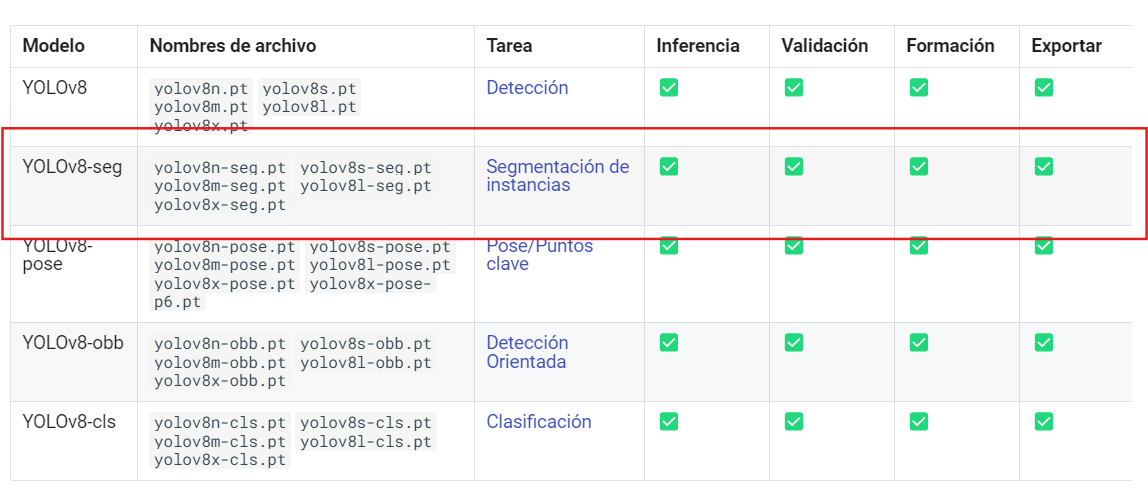

### **Instalamos los paquetes necesarios para trabajar**

In [ ]:
!pip install roboflow -q
!pip install ultralytics -q

### **Realizamos la importación de las librerías**

In [ ]:
import glob
import yaml
import os
from ultralytics import YOLO
from roboflow import Roboflow
from IPython.display import display, Image
import tensorflow as tf

### **Traemos las imágenes de Roboflow**

In [ ]:
rf = Roboflow(api_key="I2dITSGm0F7xnDpxod6V")
project = rf.workspace("projectia-khxte").project("segment-tyeq6")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.3.5, to fix: `pip install ultralytics==8.0.196`


### **Modificamos las rutas (El archivo yaml)**

In [ ]:
yamlfile = "/content/Segment-1/data.yaml" # Ruta al archivo data.yaml descargado

# Cargar el archivo YAML existente
with open(yamlfile, 'r') as file:
    data_yaml = yaml.safe_load(file)

# Actualizar las rutas para train, val y test
data_yaml['train'] = "../train/images"
data_yaml['val'] = "../valid/images"
data_yaml['test'] = "../test/images"

# Guardar los cambios en el archivo data.yaml
with open(yamlfile, 'w') as file:
    yaml.dump(data_yaml, file)

print("Archivo data.yaml modificado correctamente.")

Archivo data.yaml modificado correctamente.


# **Entrenamiento Modelo a Modelo**

Entrenar y validar el modelo ***yolov8n-seg.pt***:

"n" se refiere a "nano", la versión más ligera del modelo.
Es la más rápida y menos demandante en cuanto a recursos computacionales, pero tiene una precisión más baja en comparación con los otros modelos. Es ideal para dispositivos con recursos limitados como los dispositivos móviles.

In [ ]:
# Configuración del modelo yolov8n-seg.pt
model_name = "yolov8n-seg.pt"
data_path = "/content/Segment-1/data.yaml"
epochs = 10
imgsz = 640

# Entrenar el modelo yolov8n-seg.pt
model = YOLO(model_name)
print(f"\nEntrenando el modelo: {model_name}")

train_results_n = model.train(data=data_path, epochs=epochs, imgsz=imgsz, plots=True)
val_results_n = model.val()  # Validar el modelo

# Imprimir métricas de entrenamiento y validación
print(f"Resumen de métricas del modelo {model_name}:\n")
print("Métricas de entrenamiento:")
print(train_results_n)
print("Métricas de validación:")
print(val_results_n)



Entrenando el modelo: yolov8n-seg.pt
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Segment-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /content/Segment-1/train/labels.cache... 980 images, 0 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Segment-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]


Plotting labels to runs/segment/train6/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 72 weight(decay=0.0), 83 weight(decay=0.0005), 82 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train6
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.85G     0.5444     0.9385      2.371      1.249          4        640: 100%|██████████| 62/62 [00:28<00:00,  2.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.50it/s]

                   all        280        282    0.00334      0.996      0.864      0.715    0.00334      0.996      0.867      0.797



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.85G     0.3895     0.4206       1.29      1.087          4        640: 100%|██████████| 62/62 [00:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.13it/s]

                   all        280        282      0.954      0.651      0.864      0.637      0.885      0.604      0.763      0.378



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.85G     0.3883     0.4533      1.001       1.08          4        640: 100%|██████████| 62/62 [00:24<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.47it/s]

                   all        280        282        0.7       0.79      0.808       0.71        0.7       0.79      0.807      0.779



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.86G     0.3632      0.385     0.8064      1.064          4        640: 100%|██████████| 62/62 [00:23<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.45it/s]

                   all        280        282      0.966       0.96      0.988      0.866      0.966       0.96      0.987      0.921



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.85G     0.3448     0.3809      0.696      1.057          4        640: 100%|██████████| 62/62 [00:23<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.48it/s]

                   all        280        282      0.946      0.973      0.957      0.847      0.946      0.973      0.957       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.86G     0.3237     0.3887     0.5795      1.031          4        640: 100%|██████████| 62/62 [00:26<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.01it/s]

                   all        280        282      0.848      0.895      0.982      0.926      0.848      0.895      0.982      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.85G     0.2771     0.3584     0.4855     0.9909          4        640: 100%|██████████| 62/62 [00:23<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.10it/s]

                   all        280        282      0.978      0.966      0.994      0.945      0.978      0.966      0.994      0.971



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.86G     0.2762     0.3695     0.4375      1.003          4        640: 100%|██████████| 62/62 [00:23<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.57it/s]

                   all        280        282      0.991      0.985      0.995      0.956      0.991      0.985      0.995      0.982



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.85G      0.247     0.3199     0.4083     0.9627          4        640: 100%|██████████| 62/62 [00:23<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        280        282      0.993      0.991      0.995      0.963      0.993      0.991      0.995      0.983



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.85G     0.2196     0.2981     0.3584     0.9464          4        640: 100%|██████████| 62/62 [00:22<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

                   all        280        282      0.991      0.988      0.995      0.963      0.991      0.988      0.995      0.984



10 epochs completed in 0.084 hours.
Optimizer stripped from runs/segment/train6/weights/last.pt, 6.2MB
Optimizer stripped from runs/segment/train6/weights/best.pt, 6.2MB

Validating runs/segment/train6/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 213 layers, 2,937,174 parameters, 0 gradients, 10.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<00:00,  1.04s/it]


                   all        280        282      0.992      0.988      0.995      0.963      0.992      0.988      0.995      0.984
                   bxw        154        154      0.984          1      0.995      0.964      0.984          1      0.995      0.984
               healthy        126        128          1      0.977      0.995      0.963          1      0.977      0.995      0.984
Speed: 0.3ms preprocess, 3.3ms inference, 0.0ms loss, 5.9ms postprocess per image
Results saved to runs/segment/train6
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 213 layers, 2,937,174 parameters, 0 gradients, 10.7 GFLOPs


val: Scanning /content/Segment-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:11<00:00,  1.64it/s]


                   all        280        282      0.992      0.988      0.995      0.964      0.992      0.988      0.995      0.984
                   bxw        154        154      0.983          1      0.995      0.964      0.983          1      0.995      0.984
               healthy        126        128          1      0.977      0.995      0.964          1      0.977      0.995      0.984
Speed: 0.7ms preprocess, 7.5ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to runs/segment/train62
Resumen de métricas del modelo yolov8n-seg.pt:

Métricas de entrenamiento:
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba2801177f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Reca

Entrenar y validar el modelo ***yolov8s-seg.pt***:

"s" significa "small" (pequeño).
Este modelo es algo más grande y preciso que la versión "nano" y es adecuado para aplicaciones en tiempo real donde la precisión es moderada y se dispone de recursos más elevados.

In [ ]:
# Configuración del modelo yolov8s-seg.pt
model_name = "yolov8s-seg.pt"
data_path = "/content/Segment-1/data.yaml"
epochs = 10
imgsz = 640

# Entrenar el modelo yolov8s-seg.pt
model = YOLO(model_name)
print(f"\nEntrenando el modelo: {model_name}")

train_results_s = model.train(data=data_path, epochs=epochs, imgsz=imgsz, plots=True)
val_results_s = model.val()  # Validar el modelo

# Imprimir métricas de entrenamiento y validación
print(f"Resumen de métricas del modelo {model_name}:\n")
print("Métricas de entrenamiento:")
print(train_results_s)
print("Métricas de validación:")
print(val_results_s)



Entrenando el modelo: yolov8s-seg.pt
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/content/Segment-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train7, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /content/Segment-1/train/labels.cache... 980 images, 0 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Segment-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]


Plotting labels to runs/segment/train7/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 72 weight(decay=0.0), 83 weight(decay=0.0005), 82 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train7
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.91G     0.4887     0.9126      2.166      1.185          4        640: 100%|██████████| 62/62 [00:32<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]

                   all        280        282    0.00337      0.996      0.911      0.766    0.00337      0.996      0.911      0.842



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.94G     0.4387     0.4936      1.205      1.132          4        640: 100%|██████████| 62/62 [00:30<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        280        282      0.907      0.735      0.886      0.481      0.914      0.741       0.88      0.687



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.93G      0.429     0.5066      0.903       1.12          4        640: 100%|██████████| 62/62 [00:28<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        280        282      0.688      0.759      0.809      0.583      0.519      0.562      0.454      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.93G     0.4105     0.4889     0.6976      1.106          4        640: 100%|██████████| 62/62 [00:27<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.28it/s]

                   all        280        282      0.924      0.972      0.967      0.873      0.924      0.972      0.967      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.93G      0.368     0.5369     0.5668      1.081          4        640: 100%|██████████| 62/62 [00:29<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]

                   all        280        282        0.9      0.928      0.967      0.883        0.9      0.928      0.967      0.882



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.93G     0.3298     0.4593     0.4672      1.041          4        640: 100%|██████████| 62/62 [00:27<00:00,  2.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]

                   all        280        282      0.994      0.985      0.991       0.93      0.994      0.985      0.991      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.91G     0.2933     0.3639     0.4059      1.008          4        640: 100%|██████████| 62/62 [00:29<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.39it/s]

                   all        280        282      0.971      0.975      0.992      0.943      0.971      0.975      0.992      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10       4.9G     0.2938     0.3612     0.3574      1.018          4        640: 100%|██████████| 62/62 [00:27<00:00,  2.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.53it/s]

                   all        280        282      0.996      0.992      0.992      0.941      0.996      0.992      0.992      0.975



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.91G     0.2631     0.3172     0.3412     0.9728          4        640: 100%|██████████| 62/62 [00:27<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.34it/s]

                   all        280        282      0.999      0.989      0.992      0.956      0.999      0.989      0.992      0.984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10       4.9G     0.2288     0.2842     0.2861     0.9562          4        640: 100%|██████████| 62/62 [00:30<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        280        282      0.982      0.992      0.993      0.965      0.982      0.992      0.993      0.983



10 epochs completed in 0.103 hours.
Optimizer stripped from runs/segment/train7/weights/last.pt, 21.3MB
Optimizer stripped from runs/segment/train7/weights/best.pt, 21.3MB

Validating runs/segment/train7/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 213 layers, 10,482,454 parameters, 0 gradients, 37.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.33it/s]


                   all        280        282      0.982      0.992      0.993      0.964      0.982      0.992      0.993      0.983
                   bxw        154        154      0.965          1      0.995      0.959      0.965          1      0.995      0.984
               healthy        126        128          1      0.984       0.99      0.969          1      0.984       0.99      0.982
Speed: 0.4ms preprocess, 6.4ms inference, 0.0ms loss, 3.3ms postprocess per image
Results saved to runs/segment/train7
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 213 layers, 10,482,454 parameters, 0 gradients, 37.3 GFLOPs


val: Scanning /content/Segment-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:08<00:00,  2.24it/s]


                   all        280        282      0.982      0.992      0.993      0.965      0.982      0.992      0.993      0.983
                   bxw        154        154      0.965          1      0.995      0.961      0.965          1      0.995      0.984
               healthy        126        128          1      0.984       0.99      0.969          1      0.984       0.99      0.982
Speed: 0.4ms preprocess, 12.7ms inference, 0.0ms loss, 2.7ms postprocess per image
Results saved to runs/segment/train72
Resumen de métricas del modelo yolov8s-seg.pt:

Métricas de entrenamiento:
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba27f47ac20>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Rec

Entrenar y validar el modelo ***yolov8m-seg.pt***:

"m" representa "medium" (mediano).
Tiene un equilibrio entre precisión y velocidad, siendo útil para aplicaciones que necesitan un nivel de precisión más alto y cuentan con una capacidad de procesamiento moderada.

In [ ]:
# Configuración del modelo yolov8m-seg.pt
model_name = "yolov8m-seg.pt"
data_path = "/content/Segment-1/data.yaml"
epochs = 10
imgsz = 640

# Entrenar el modelo yolov8m-seg.pt
model = YOLO(model_name)
print(f"\nEntrenando el modelo: {model_name}")

train_results_m = model.train(data=data_path, epochs=epochs, imgsz=imgsz, plots=True)
val_results_m = model.val()  # Validar el modelo

# Imprimir métricas de entrenamiento y validación
print(f"Resumen de métricas del modelo {model_name}:\n")
print("Métricas de entrenamiento:")
print(train_results_m)
print("Métricas de validación:")
print(val_results_m)



Entrenando el modelo: yolov8m-seg.pt
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/Segment-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train8, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False,

train: Scanning /content/Segment-1/train/labels.cache... 980 images, 0 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Segment-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]


Plotting labels to runs/segment/train8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 92 weight(decay=0.0), 103 weight(decay=0.0005), 102 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train8
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10       8.1G     0.4323     0.6995      1.937      1.151          4        640: 100%|██████████| 62/62 [00:50<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        280        282      0.883      0.417       0.82      0.616      0.894      0.421      0.834      0.731



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      8.22G     0.4606     0.5444       1.07      1.151          4        640: 100%|██████████| 62/62 [00:46<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.49it/s]

                   all        280        282      0.888      0.657      0.771      0.575      0.887       0.66      0.788      0.612



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      8.22G       0.44     0.5848     0.7608       1.13          4        640: 100%|██████████| 62/62 [00:45<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.51it/s]

                   all        280        282      0.856      0.922      0.967      0.795      0.856      0.922      0.967      0.886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      8.23G     0.4254     0.4937     0.6013      1.126          4        640: 100%|██████████| 62/62 [00:45<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.32it/s]

                   all        280        282      0.925      0.959       0.98      0.859      0.925      0.959       0.98      0.942



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10       8.2G     0.3871     0.5829     0.5049      1.099          4        640: 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]

                   all        280        282      0.964      0.948      0.971      0.871      0.964      0.948      0.971      0.908



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10       8.2G     0.3434     0.4905     0.4389      1.058          4        640: 100%|██████████| 62/62 [00:45<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.54it/s]

                   all        280        282      0.977      0.969      0.983       0.92      0.977      0.969      0.983      0.961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10       8.2G     0.2961      0.416     0.3745      1.014          4        640: 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.30it/s]

                   all        280        282      0.991      0.985      0.992      0.933      0.991      0.985      0.992      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10       8.2G     0.2999      0.439     0.3414      1.025          4        640: 100%|██████████| 62/62 [00:45<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]

                   all        280        282      0.998      0.989      0.992      0.947      0.998      0.989      0.992      0.973



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10       8.2G     0.2678     0.3524     0.3204       0.98          4        640: 100%|██████████| 62/62 [00:45<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]

                   all        280        282      0.999      0.989      0.991       0.95      0.999      0.989      0.991      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      8.21G     0.2362     0.3302     0.2676      0.965          4        640: 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<00:00,  1.27it/s]

                   all        280        282      0.993      0.989      0.991      0.954      0.993      0.989      0.991      0.978



10 epochs completed in 0.176 hours.
Optimizer stripped from runs/segment/train8/weights/last.pt, 49.6MB
Optimizer stripped from runs/segment/train8/weights/best.pt, 49.6MB

Validating runs/segment/train8/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 263 layers, 24,586,614 parameters, 0 gradients, 98.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:16<00:00,  1.79s/it]


                   all        280        282      0.993      0.989      0.991      0.954      0.993      0.989      0.991      0.978
                   bxw        154        154      0.986          1      0.995      0.955      0.986          1      0.995      0.984
               healthy        126        128          1      0.977      0.986      0.954          1      0.977      0.986      0.972
Speed: 0.3ms preprocess, 13.0ms inference, 0.1ms loss, 12.9ms postprocess per image
Results saved to runs/segment/train8
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 263 layers, 24,586,614 parameters, 0 gradients, 98.7 GFLOPs


val: Scanning /content/Segment-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:14<00:00,  1.20it/s]


                   all        280        282      0.993      0.989      0.991      0.955      0.993      0.989      0.991      0.978
                   bxw        154        154      0.986          1      0.995      0.954      0.986          1      0.995      0.984
               healthy        126        128          1      0.977      0.986      0.955          1      0.977      0.986      0.972
Speed: 0.4ms preprocess, 28.7ms inference, 0.0ms loss, 6.2ms postprocess per image
Results saved to runs/segment/train82
Resumen de métricas del modelo yolov8m-seg.pt:

Métricas de entrenamiento:
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ba26a7c94b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Rec

Entrenar y validar el modelo ***yolov8x-seg.pt***:

"x" se refiere a "extra-large" (extra grande).
Es la versión más precisa y demandante en términos de recursos de cómputo, adecuada para aplicaciones que requieren la máxima precisión y disponen de hardware potente, como servidores con GPU.

In [ ]:
# Configuración del modelo yolov8x-seg.pt
model_name = "yolov8x-seg.pt"
data_path = "/content/Segment-1/data.yaml"
epochs = 10
imgsz = 640

# Entrenar el modelo yolov8x-seg.pt
model = YOLO(model_name)
print(f"\nEntrenando el modelo: {model_name}")

train_results_x = model.train(data=data_path, epochs=epochs, imgsz=imgsz, plots=True)
val_results_x = model.val()  # Validar el modelo

# Imprimir métricas de entrenamiento y validación
print(f"Resumen de métricas del modelo {model_name}:\n")
print("Métricas de entrenamiento:")
print(train_results_x)
print("Métricas de validación:")
print(val_results_x)


100%|██████████| 137M/137M [00:01<00:00, 107MB/s]



Entrenando el modelo: yolov8x-seg.pt
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8x-seg.pt, data=/content/Segment-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train10, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False

train: Scanning /content/Segment-1/train/labels.cache... 980 images, 0 backgrounds, 0 corrupt: 100%|██████████| 980/980 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.17 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Segment-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]


Plotting labels to runs/segment/train10/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 112 weight(decay=0.0), 123 weight(decay=0.0005), 122 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train10
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10      15.6G     0.4983     0.8095      1.832        1.2          4        640: 100%|██████████| 62/62 [01:39<00:00,  1.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.37s/it]

                   all        280        282      0.137       0.38      0.086     0.0307     0.0526     0.0507     0.0402     0.0195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10      15.3G     0.5111     0.6749      1.007      1.208          4        640: 100%|██████████| 62/62 [01:36<00:00,  1.55s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.36s/it]

                   all        280        282      0.788      0.251       0.49      0.274      0.747       0.23      0.444      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10      15.3G     0.5071     0.7085     0.6918        1.2          4        640: 100%|██████████| 62/62 [01:35<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.34s/it]

                   all        280        282      0.527      0.352      0.175     0.0937      0.505      0.286       0.14     0.0803



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10      15.3G     0.4467     0.5863     0.5566       1.15          4        640: 100%|██████████| 62/62 [01:35<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

                   all        280        282      0.738      0.797      0.878      0.666      0.711      0.779       0.84      0.619



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10      15.3G     0.4002     0.6744     0.5171      1.119          4        640: 100%|██████████| 62/62 [01:35<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.35s/it]

                   all        280        282      0.954      0.954      0.983      0.903      0.954      0.954      0.983      0.906



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10      15.3G     0.3483     0.5153     0.4278      1.058          4        640: 100%|██████████| 62/62 [01:35<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.32s/it]

                   all        280        282      0.992      0.981      0.984      0.919      0.992      0.981      0.984      0.952



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10      15.3G     0.3241     0.4599     0.3716      1.036          4        640: 100%|██████████| 62/62 [01:35<00:00,  1.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.33s/it]

                   all        280        282      0.991      0.992       0.99      0.937      0.991      0.992       0.99       0.97



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/10      15.3G     0.3035     0.4592     0.3326      1.034          4        640: 100%|██████████| 62/62 [01:34<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.30s/it]

                   all        280        282      0.986      0.979      0.991      0.949      0.986      0.979      0.991      0.978



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/10      15.3G     0.2792     0.4102     0.2992     0.9965          4        640: 100%|██████████| 62/62 [01:35<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

                   all        280        282      0.999      0.989      0.994      0.952      0.999      0.989      0.994      0.976



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/10      15.3G     0.2475     0.3734     0.2809     0.9739          4        640: 100%|██████████| 62/62 [01:35<00:00,  1.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:11<00:00,  1.31s/it]

                   all        280        282      0.995      0.988       0.99      0.959      0.995      0.988       0.99      0.978



10 epochs completed in 0.331 hours.
Optimizer stripped from runs/segment/train10/weights/last.pt, 130.9MB
Optimizer stripped from runs/segment/train10/weights/best.pt, 130.9MB

Validating runs/segment/train10/weights/best.pt...
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 313 layers, 65,194,582 parameters, 0 gradients, 313.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<00:00,  1.43s/it]


                   all        280        282      0.995      0.988       0.99      0.959      0.995      0.988       0.99      0.978
                   bxw        154        154       0.99          1      0.994       0.96       0.99          1      0.994      0.981
               healthy        126        128      0.999      0.977      0.987      0.959      0.999      0.977      0.987      0.976
Speed: 0.3ms preprocess, 33.2ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to runs/segment/train10
Ultralytics 8.3.5 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8x-seg summary (fused): 313 layers, 65,194,582 parameters, 0 gradients, 313.0 GFLOPs


val: Scanning /content/Segment-1/valid/labels.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:28<00:00,  1.56s/it]


                   all        280        282      0.995      0.988       0.99      0.959      0.995      0.988       0.99      0.978
                   bxw        154        154       0.99          1      0.994      0.959       0.99          1      0.994      0.981
               healthy        126        128      0.999      0.977      0.987      0.959      0.999      0.977      0.987      0.976
Speed: 0.6ms preprocess, 85.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/segment/train102
Resumen de métricas del modelo yolov8x-seg.pt:

Métricas de entrenamiento:
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78135c818850>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Re

# **Resultados**

| Modelo          | Precisión (P) | Recall (R) | mAP@50 | mAP@50-95 | Máscara (P) | Máscara (R) | Máscara mAP@50 | Máscara mAP@50-95 |
|-----------------|---------------|------------|--------|-----------|-------------|-------------|----------------|-------------------|
| YOLOv8n-seg.pt  | 1.000         | 0.977      | 0.995  | 0.963     | 1.000       | 0.977       | 0.995          | 0.984             |
| YOLOv8s-seg.pt  | 1.000         | 0.984      | 0.990  | 0.969     | 1.000       | 0.984       | 0.990          | 0.982             |
| YOLOv8m-seg.pt  | 1.000         | 0.977      | 0.986  | 0.955     | 1.000       | 0.977       | 0.986          | 0.972             |
| YOLOv8x-seg.pt  | 0.999         | 0.977      | 0.987  | 0.959     | 0.999       | 0.977       | 0.987          | 0.976             |


Nos centramos en mAP@50 (Mean Average Precision al 50% de IoU) porque es una métrica clave que mide la precisión del modelo en la detección y segmentación de objetos, considerando un umbral del 50% de IoU (Intersection over Union). Ofrece un equilibrio entre P (Precisión) y R (Recall), lo que facilita la comparación entre modelos sin ser demasiado estricto en cuanto a la exactitud de las predicciones.

Enfocándonos únicamente en el valor de mAP@50 para la clase "healthy", la comparación es la siguiente:

* YOLOv8n-seg.pt: 0.995
* YOLOv8s-seg.pt: 0.990
* YOLOv8m-seg.pt: 0.986
* YOLOv8x-seg.pt: 0.987

YOLOv8n-seg.pt es el modelo con mejor rendimiento en mAP@50, alcanzando un valor de 0.995, lo que lo posiciona ligeramente por encima de los otros modelos en términos de esta métrica específica.

Teniendo en cuenta esto, en el Notebook del modelo, trabajaremos con ***YOLOv8n-seg.pt***